In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
X=np.arange(0,5,0.13)
print(X[:3])
y=1.229*X + 9.887
print(y[:3])
print(len(X),len(y))

[0.   0.13 0.26]
[ 9.887   10.04677 10.20654]
39 39


In [ ]:
split=int(len(X)*0.8)
print(split)
X_train,y_train=X[:split],y[:split]#0 t0 60
X_test,y_test=X[split:],y[split:]#61 to 77

31


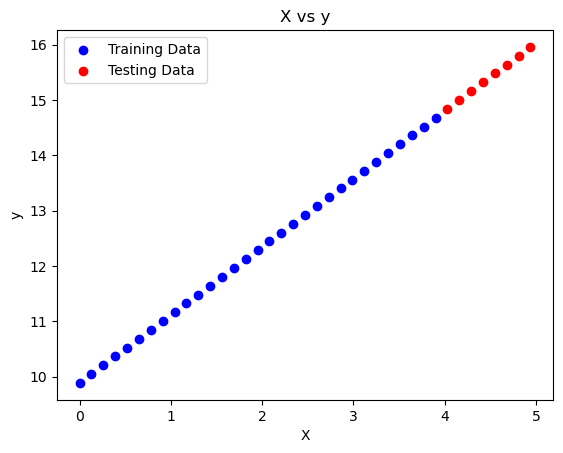

In [ ]:
def plot_data(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,predictions=None):#default values are set
    plt.scatter(X_train,y_train,c='b',label="Training Data")
    plt.scatter(X_test,y_test,c='r',label="Testing Data")
    if predictions is not None:
      plt.plot(X_test,predictions,c='g',label='Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('X vs y')
    plt.legend()
    plt.show()
  
plot_data()

In [ ]:
w=np.random.randn()
b=np.random.randn()
print(f"Initially w={w} and b={b}")

Initially w=0.23605529751206042 and b=-0.7684261901526487


In [ ]:
def loss_fn(y_actual,y_out):
  return np.sum(np.square((y_actual-y_out)/len(y_actual)))

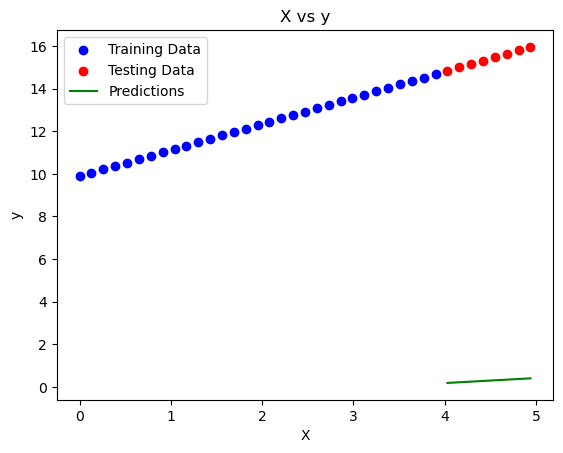

In [ ]:
y_out =X_test *w + b
plot_data(predictions=y_out)

In [ ]:
lr=0.1 # same as radio tuning speed
epochs=200
train_loss_list=[]
test_loss_list=[]
for epoch in range(epochs):
  ## training
  # forward pass
  train_preds=X_train*w +b
  #compute the loss
  train_loss=loss_fn(y_actual=y_train,y_out=train_preds)
  #compute the gradients
  gradientW=(-2/len(X_train))*np.sum((y_train-train_preds)*X_train)
  gradientB=(-2/len(X_train))*np.sum((y_train-train_preds))
  #back propagate
  w=w-gradientW*lr
  b=b-gradientB*lr
  #Testing
  test_preds=X_test *w +b
  test_loss=loss_fn(y_actual=y_test,y_out=test_preds)
  if(epoch+1)%10==0:
    print(f'Epoch {epoch+1} | Train loss {train_loss:.4f}|Test loss {test_loss:.4f}')
  train_loss_list.append(train_loss)
  test_loss_list.append(test_loss)

Epoch 10 | Train loss 0.2891|Test loss 2.3780
Epoch 20 | Train loss 0.1136|Test loss 0.9345
Epoch 30 | Train loss 0.0446|Test loss 0.3672
Epoch 40 | Train loss 0.0175|Test loss 0.1443
Epoch 50 | Train loss 0.0069|Test loss 0.0567
Epoch 60 | Train loss 0.0027|Test loss 0.0223
Epoch 70 | Train loss 0.0011|Test loss 0.0088
Epoch 80 | Train loss 0.0004|Test loss 0.0034
Epoch 90 | Train loss 0.0002|Test loss 0.0014
Epoch 100 | Train loss 0.0001|Test loss 0.0005
Epoch 110 | Train loss 0.0000|Test loss 0.0002
Epoch 120 | Train loss 0.0000|Test loss 0.0001
Epoch 130 | Train loss 0.0000|Test loss 0.0000
Epoch 140 | Train loss 0.0000|Test loss 0.0000
Epoch 150 | Train loss 0.0000|Test loss 0.0000
Epoch 160 | Train loss 0.0000|Test loss 0.0000
Epoch 170 | Train loss 0.0000|Test loss 0.0000
Epoch 180 | Train loss 0.0000|Test loss 0.0000
Epoch 190 | Train loss 0.0000|Test loss 0.0000
Epoch 200 | Train loss 0.0000|Test loss 0.0000


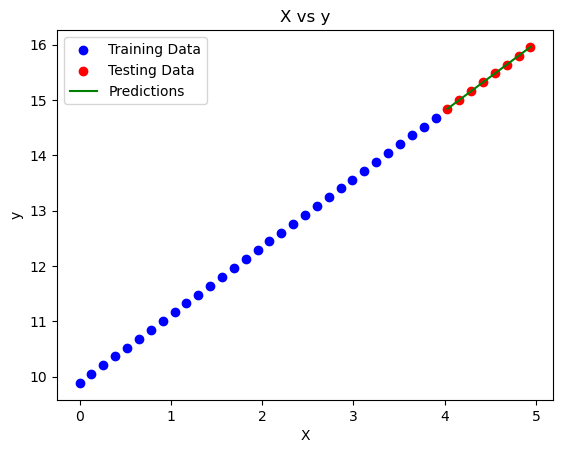

In [ ]:
test_preds=X_test *w +b
plot_data(predictions=test_preds)


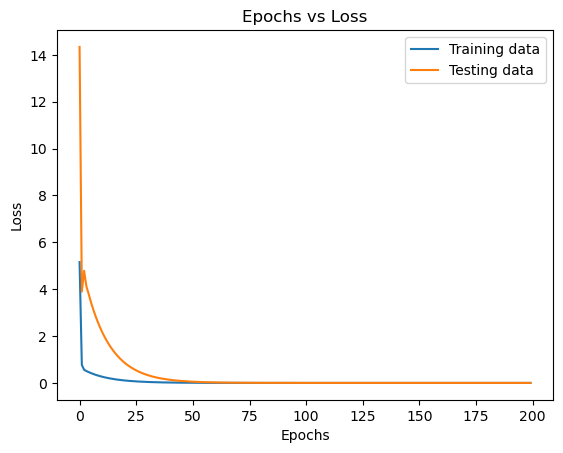

In [ ]:
plt.plot(range(epochs),train_loss_list,label="Training data")
plt.plot(range(epochs),test_loss_list,label="Testing data")
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
print(f"Finally w={w} and b={b}")

Finally w=1.2293084662992382 and b=9.886220708620085


In [ ]:
import torch
print(f"Using version {torch.__version__}")
if torch.cuda.is_available():
  device="cuda"
elif torch.backends.mps.is_available():
  devide="mps"